In [ ]:
sfrom google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [ ]:
# Git clone method (for development)

%cd {HOME}
!git clone github.com/ultralytics/ultralytics
%cd {HOME}/ultralytics
!pip install -e .

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='/content/drive/MyDrive/IMG_20200229_165108.jpg' save=True


/content
100% 6.23M/6.23M [00:00<00:00, 77.5MB/s]

2023-11-12 16:14:36.178280: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 16:14:36.178344: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 16:14:36.178380: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 16:14:36.191664: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.

In [ ]:
# import matplotlib.pyplot as plt
# plt.imshow(r"/content/runs/detect/predict/IMG_20200229_165108.jpg")

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="c2VmkPyw3tV8egvbtta0")
project = rf.workspace("university-n4tcp").project("fruits-quality-prediction")
dataset = project.version(3).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 699.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fruits-Quality-Prediction-3 in yolov8:: 100%|██████████| 6620/6620 [00:00<00:00, 7277.37it/s]


In [ ]:
## Custom Training
%cd {HOME}

/content


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=1024 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 161MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Fruits-Quality-Prediction-3/data.yaml, epochs=25, patience=50, batch=16, imgsz=1024, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchsc

/content


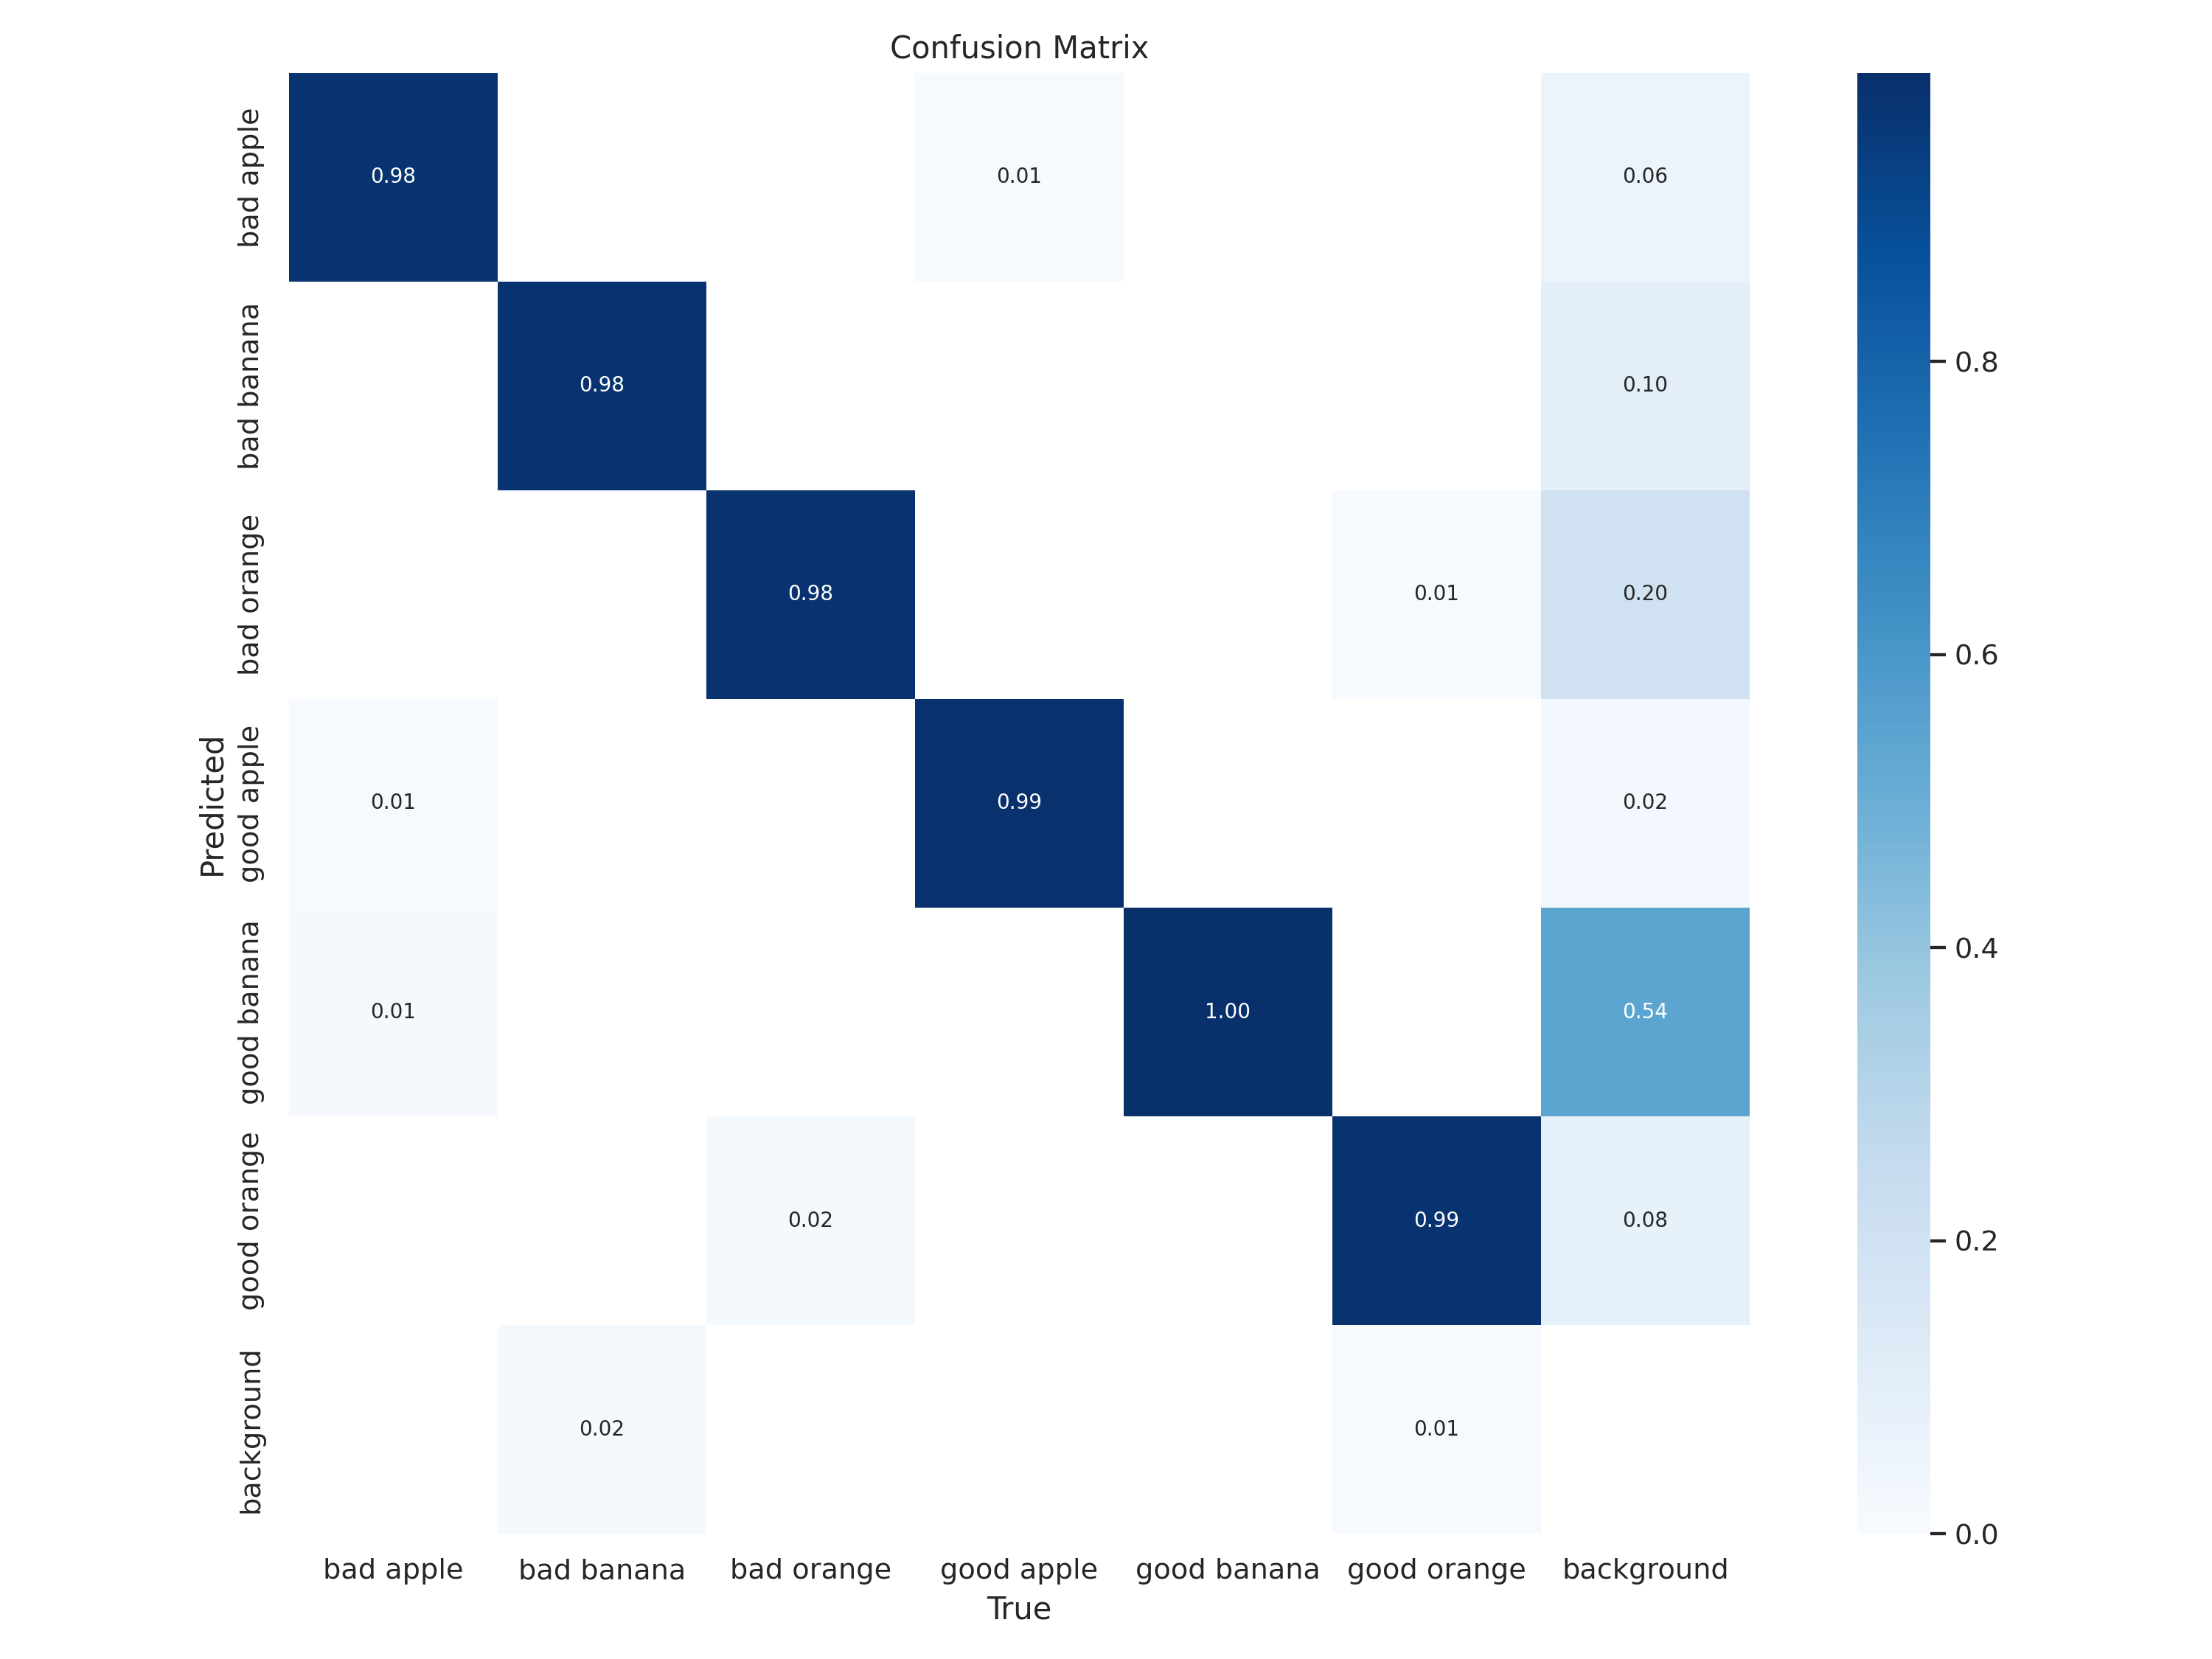

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


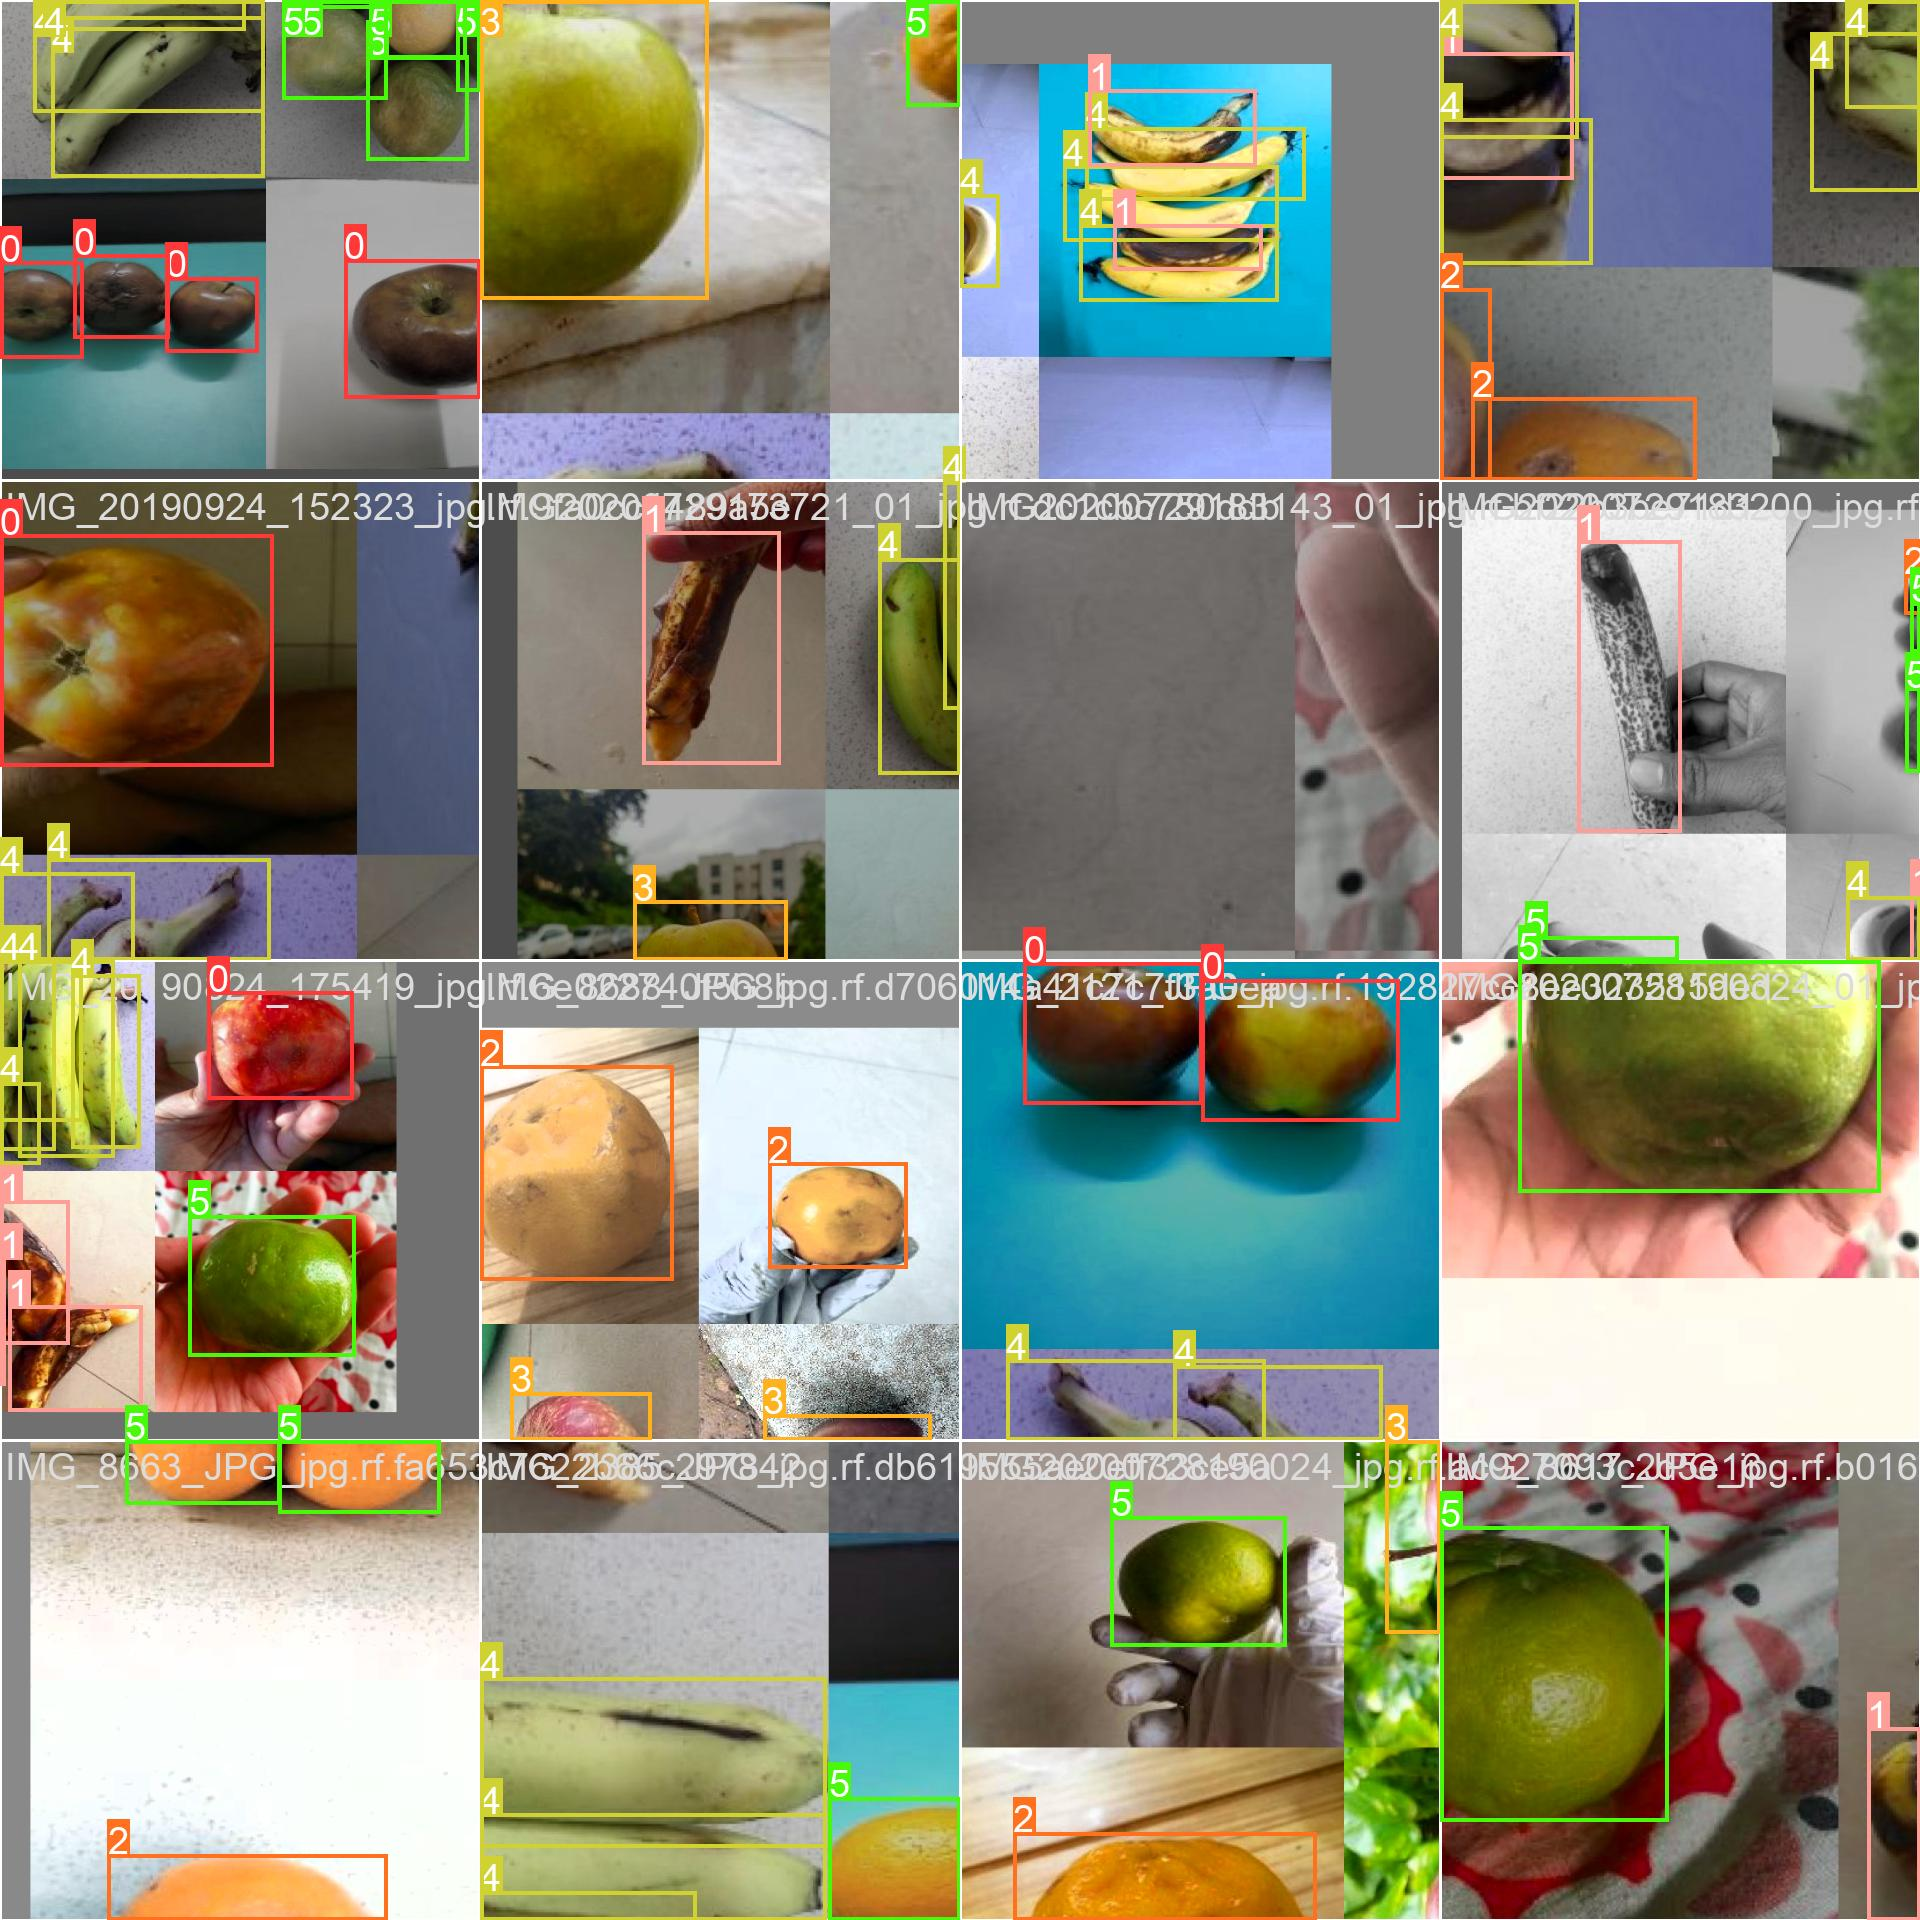

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/train_batch1.jpg', width=600)

/content


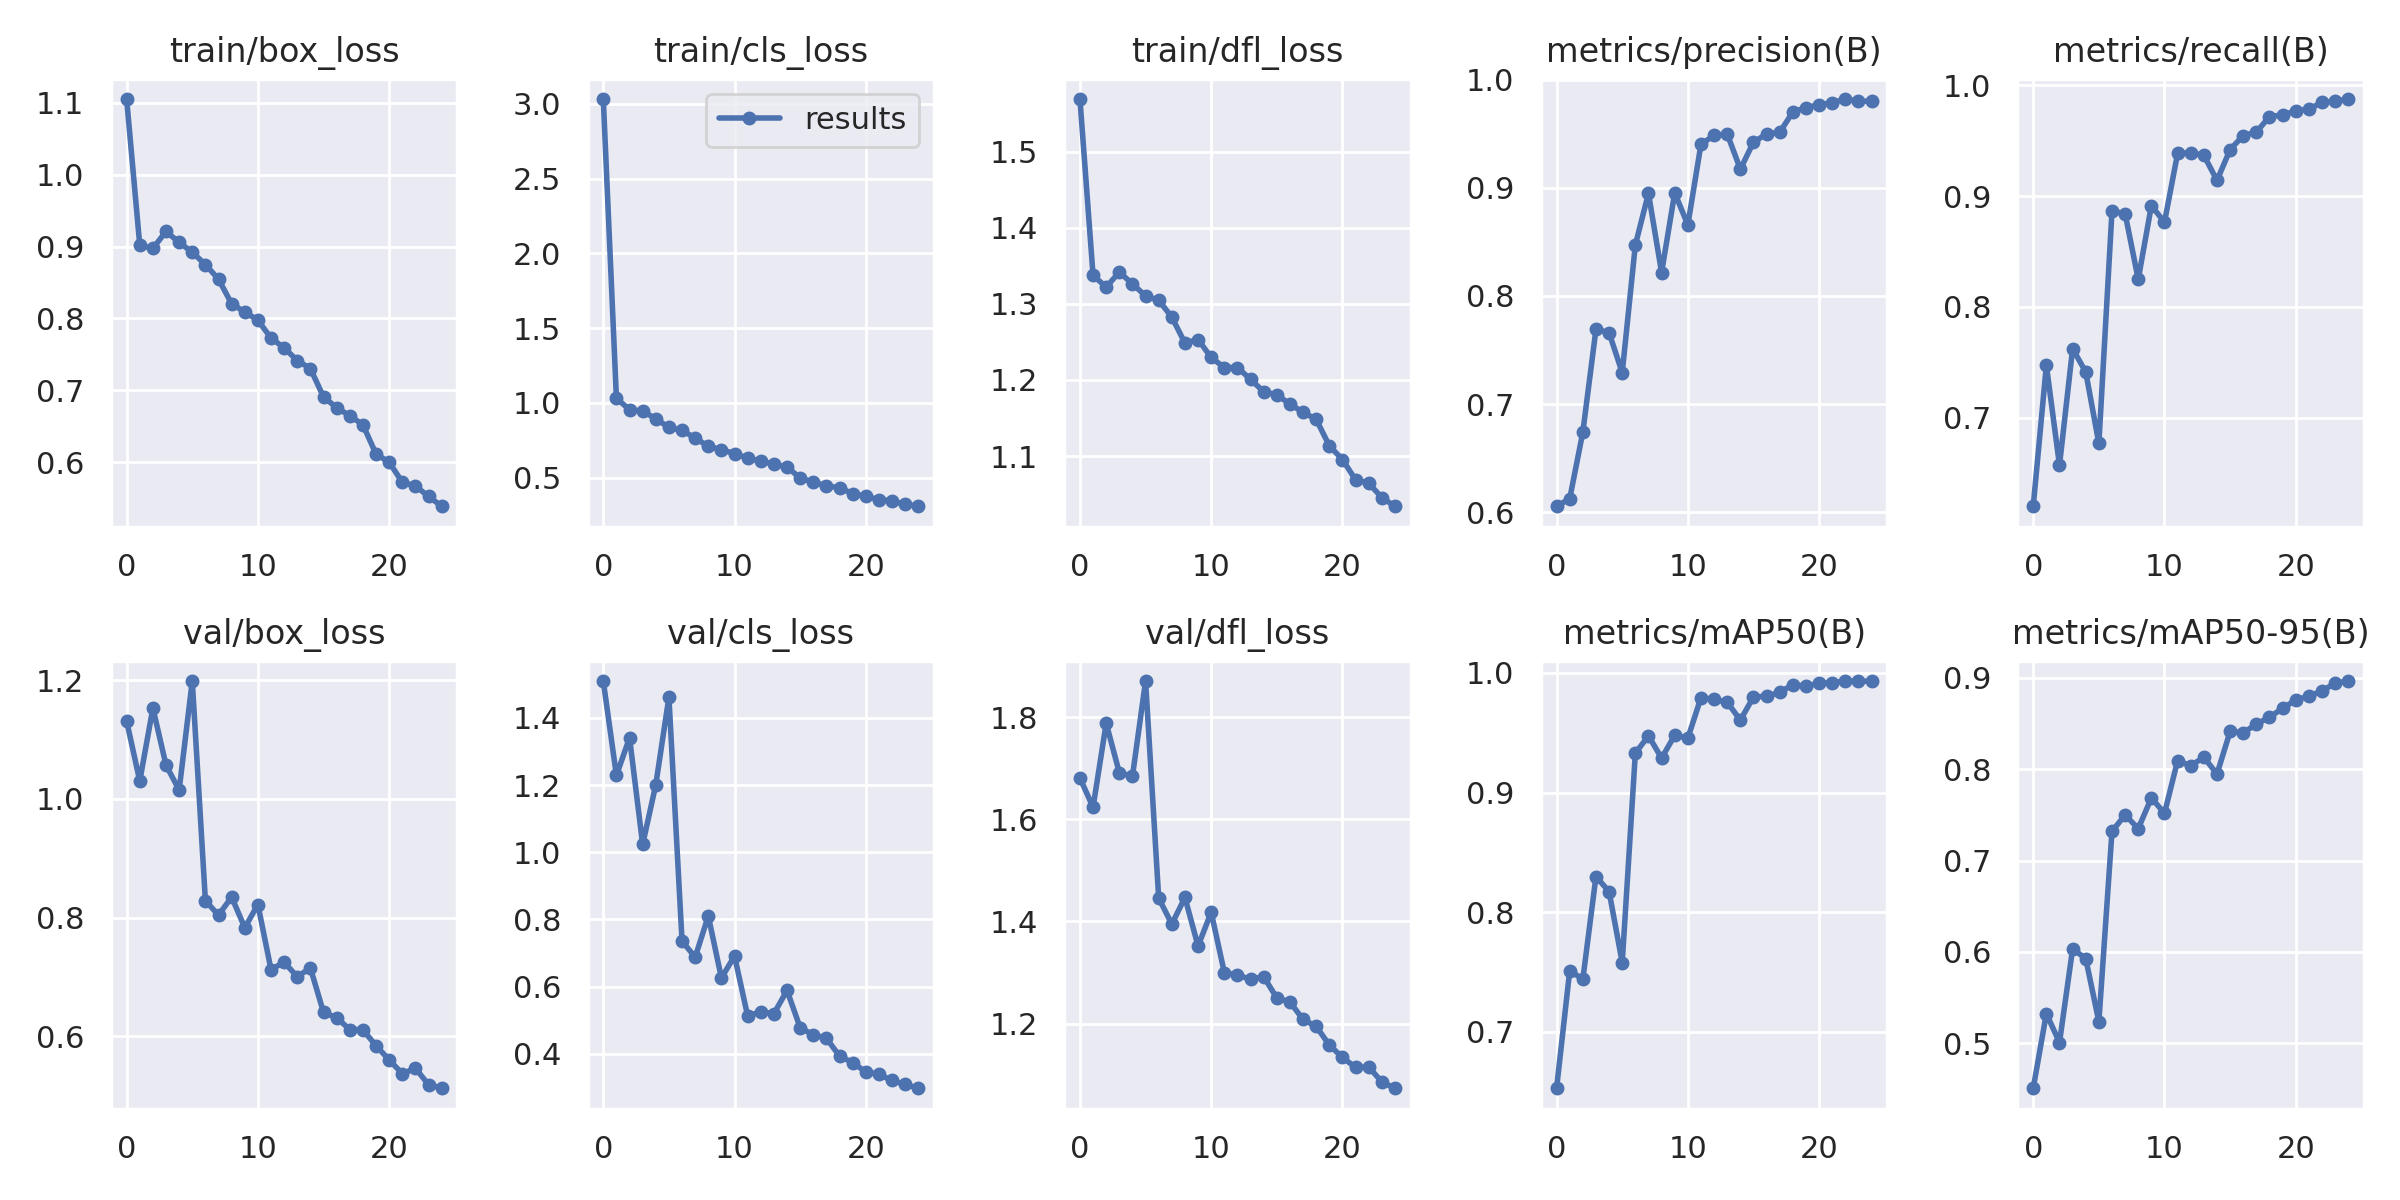

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


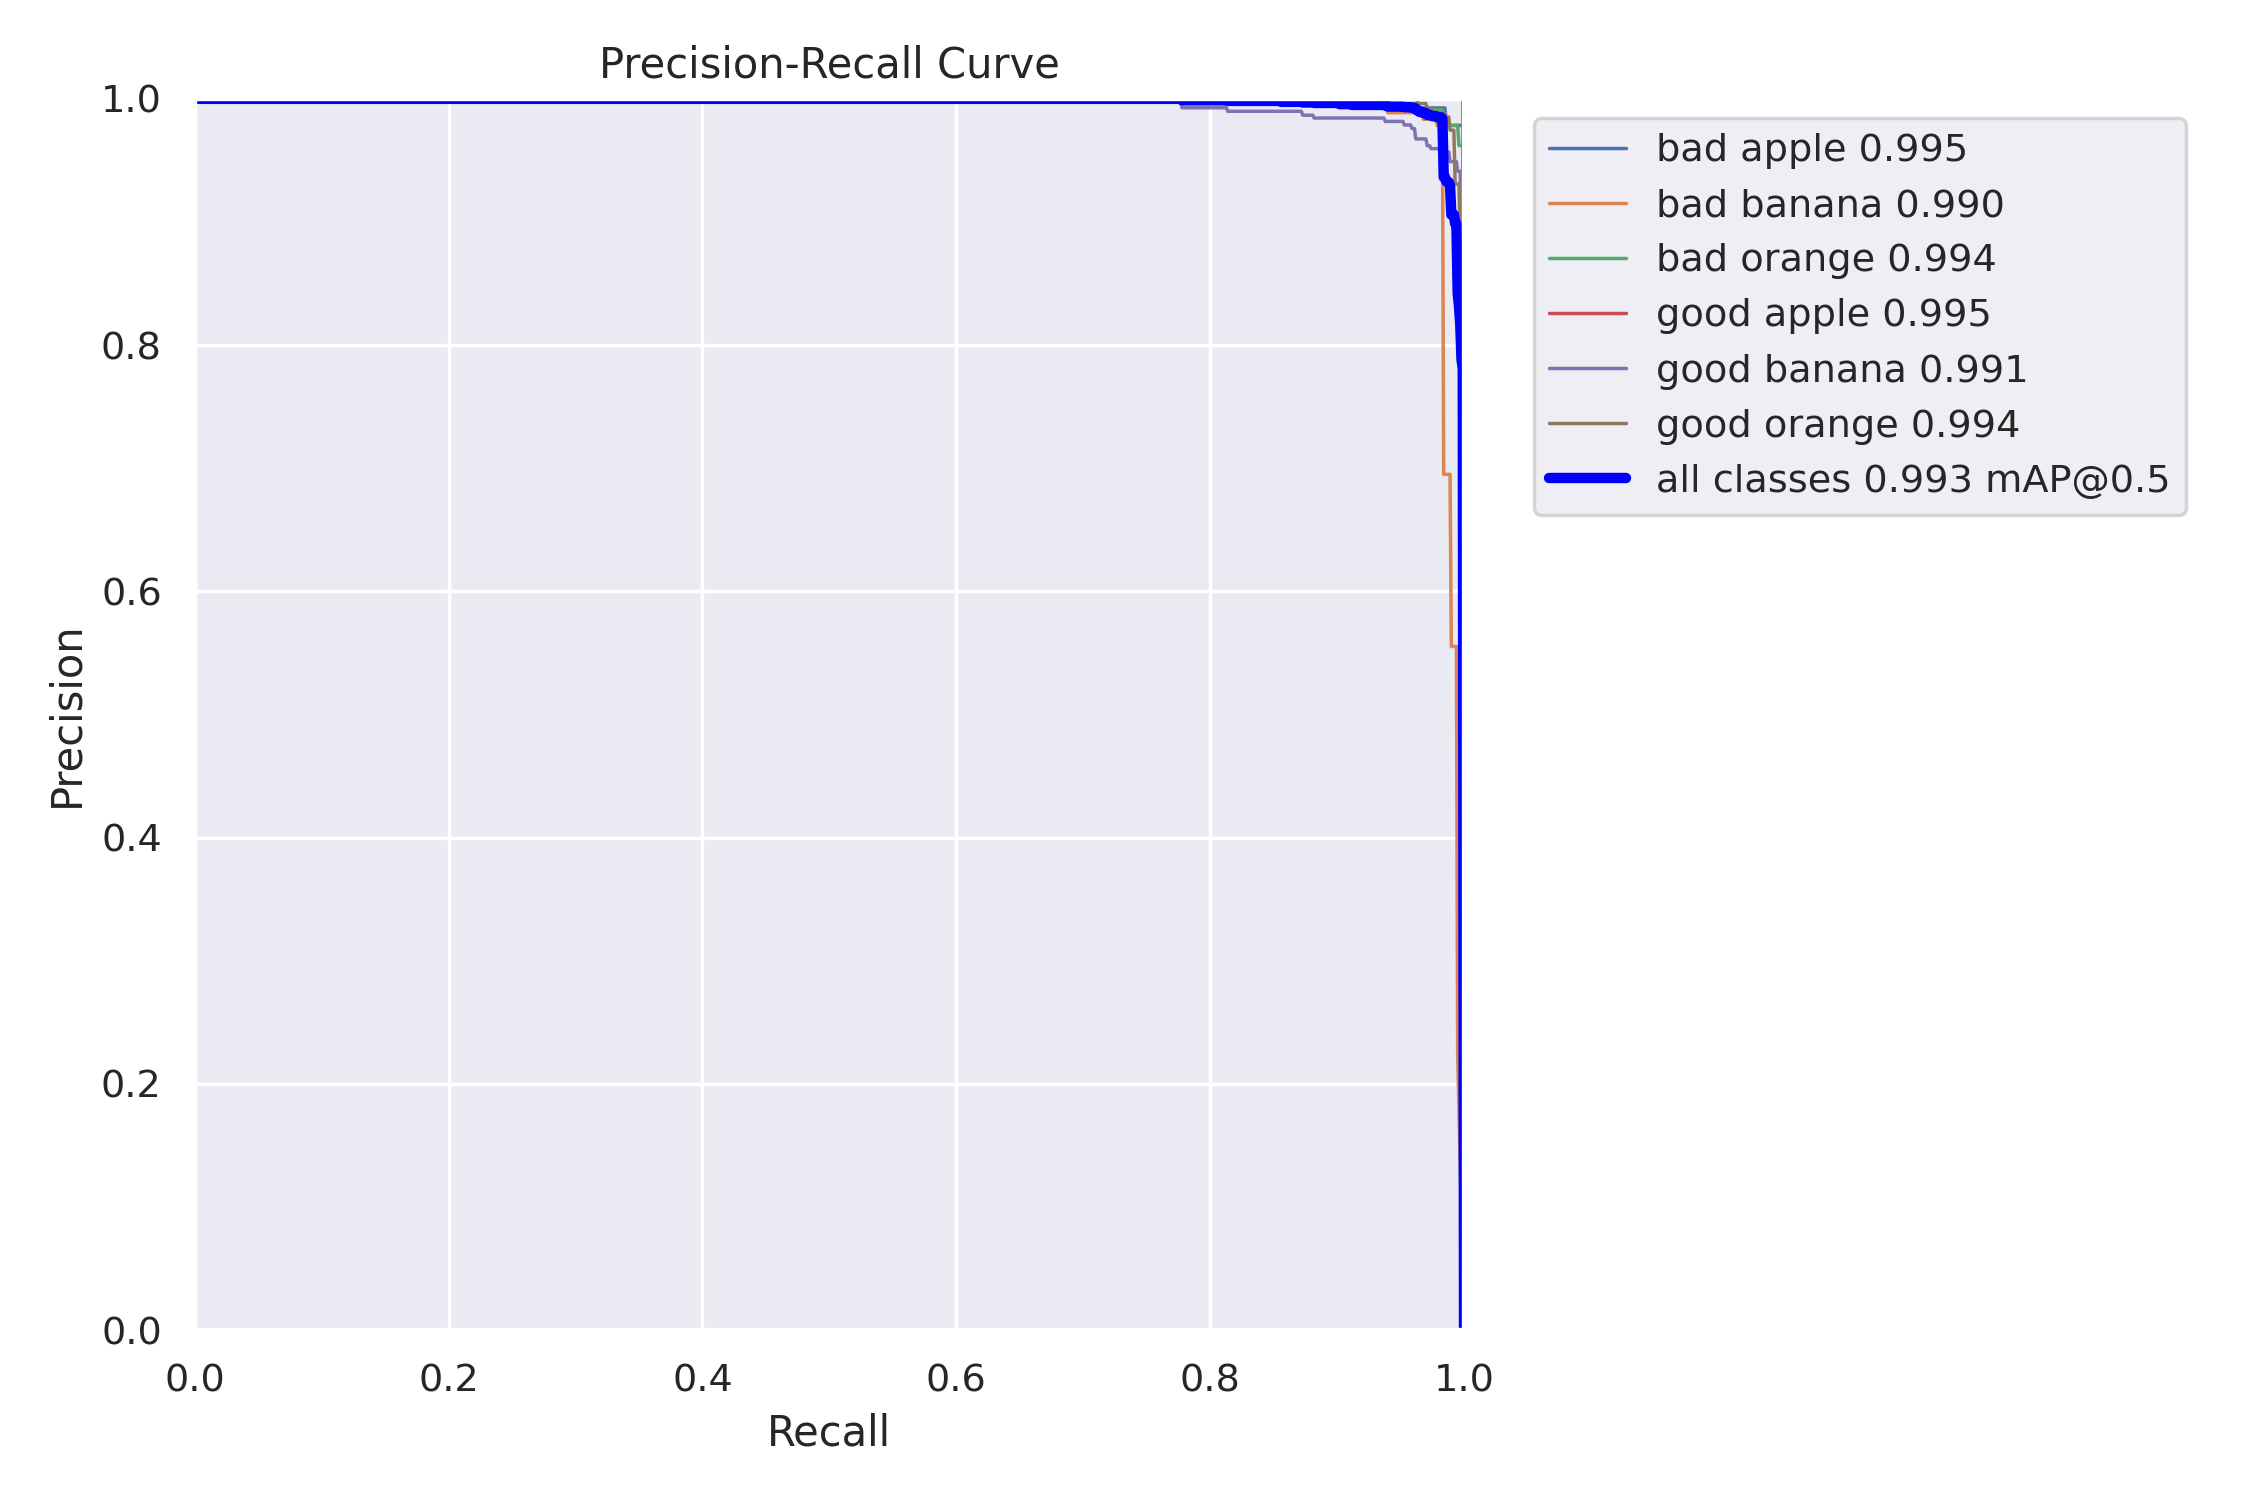

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/PR_curve.png', width=600)


/content


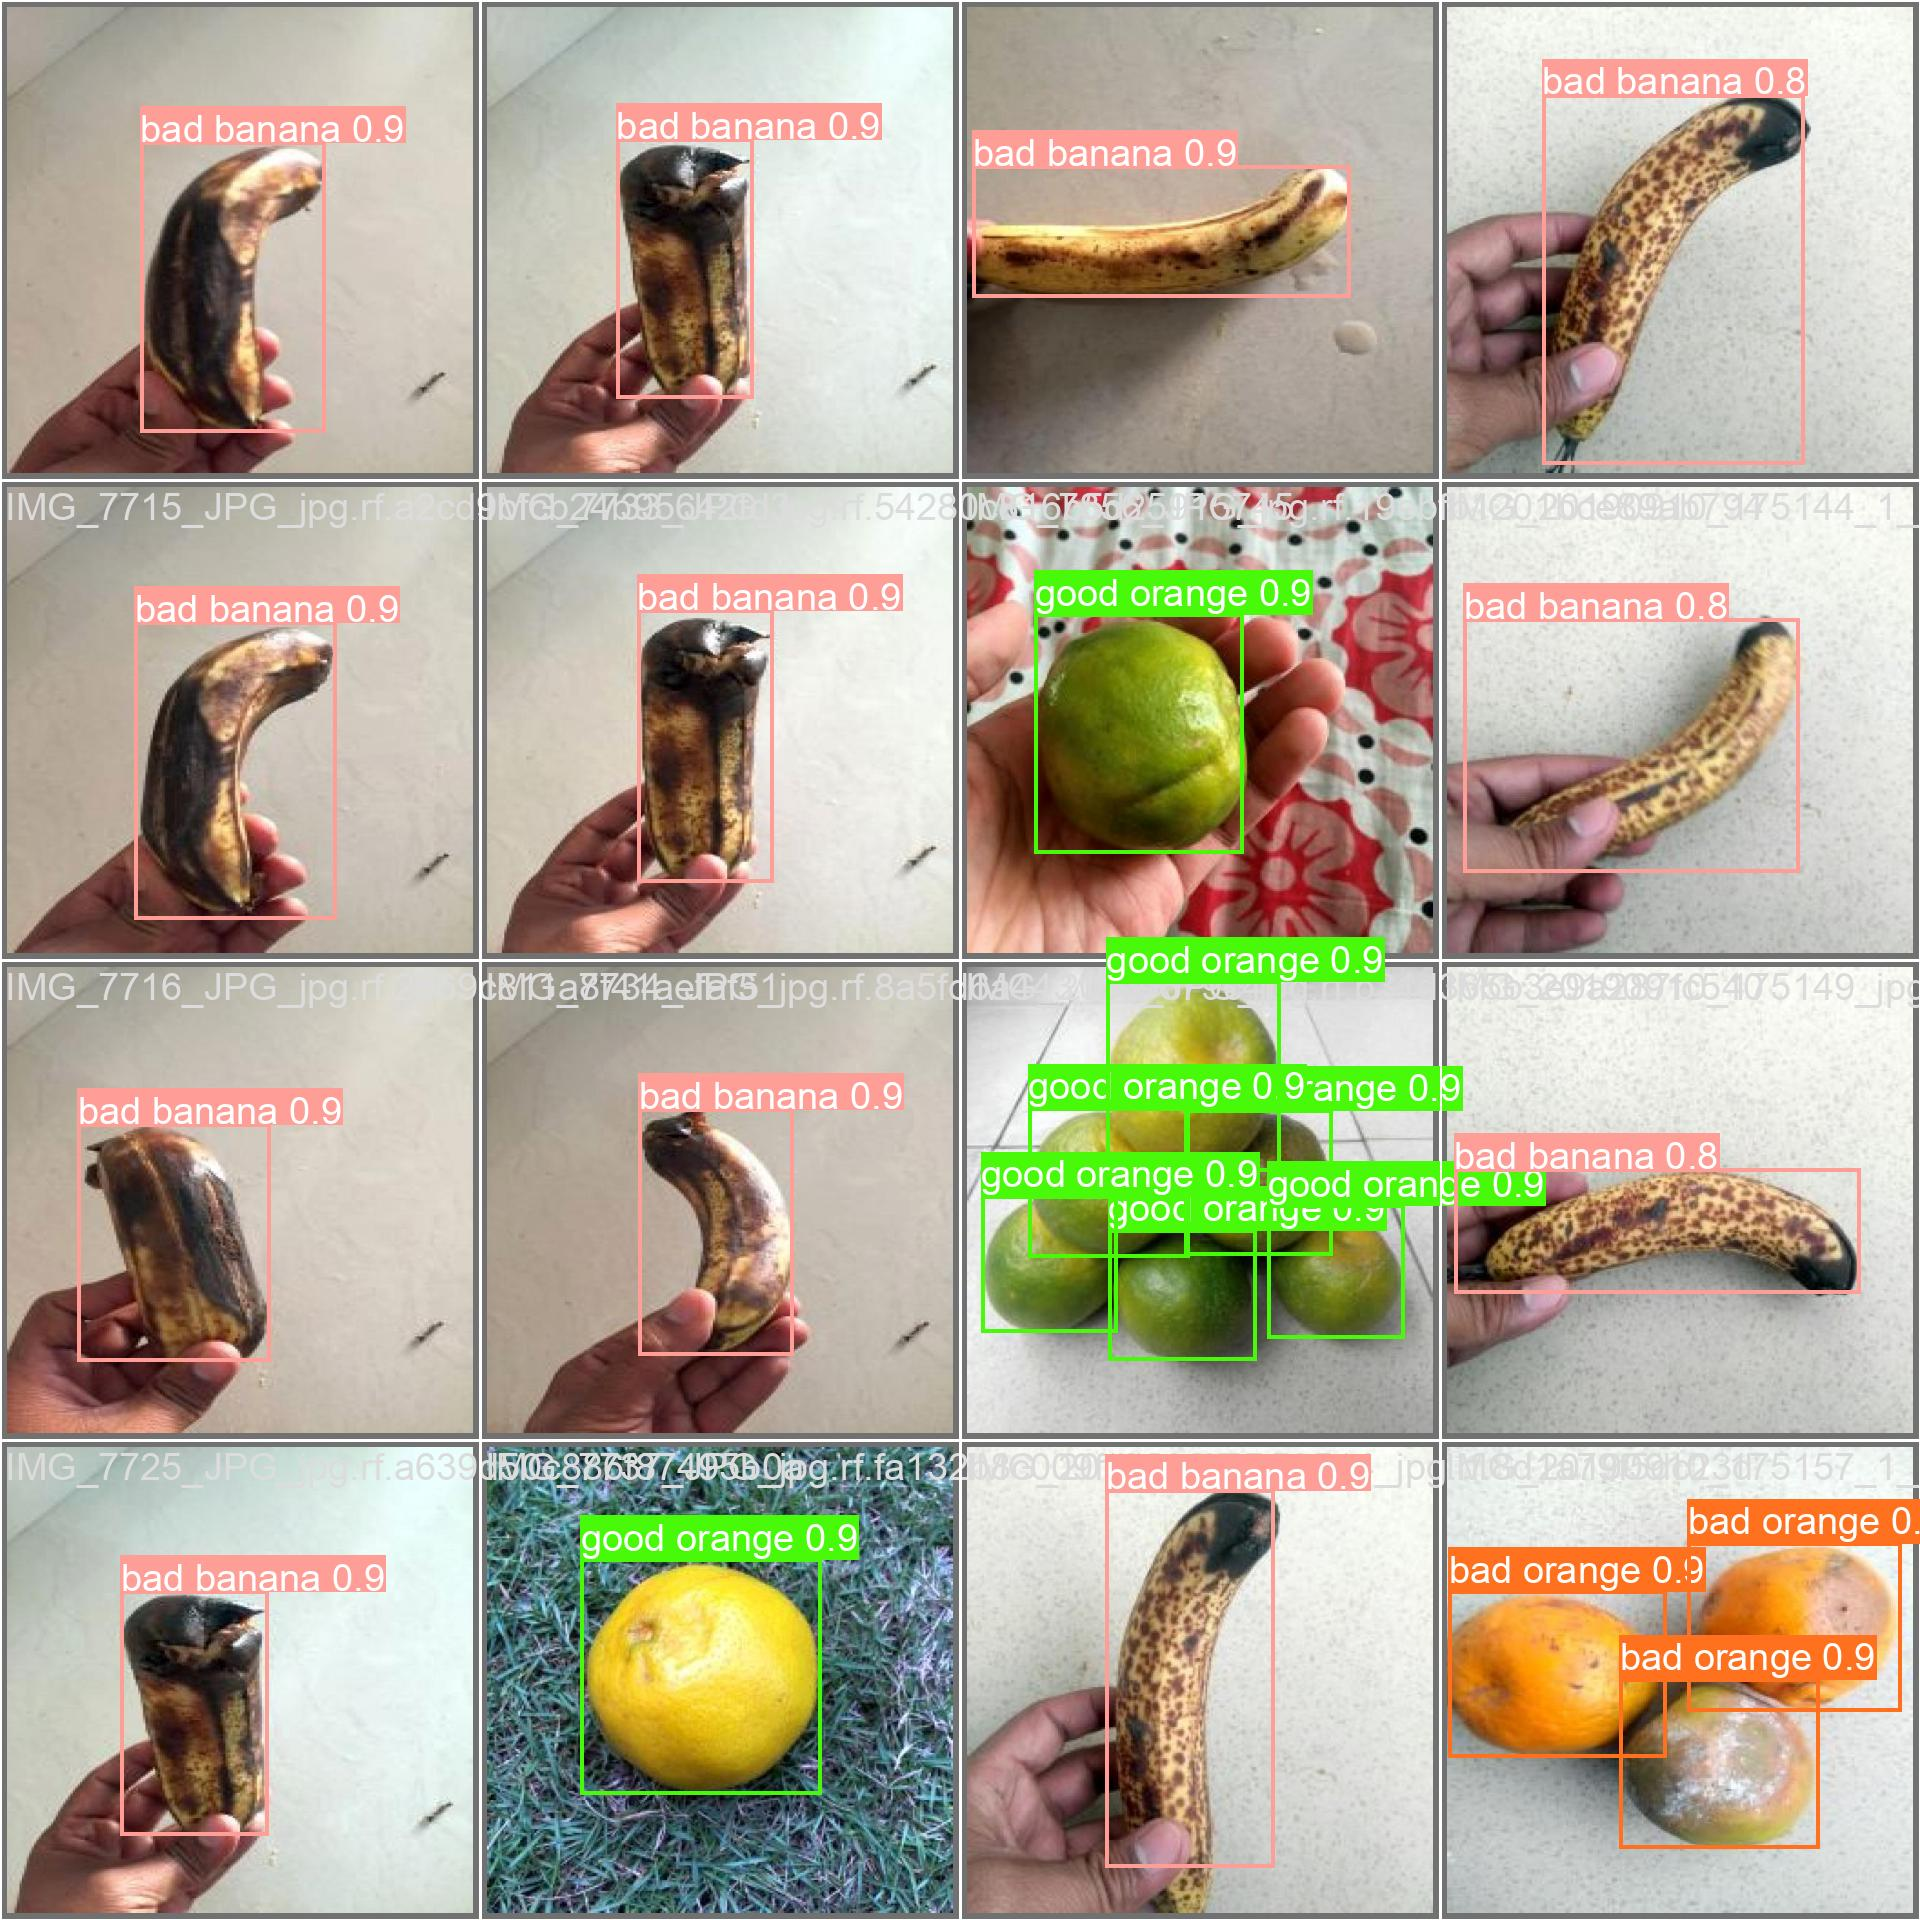

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch2_pred.jpg', width=600)

/content


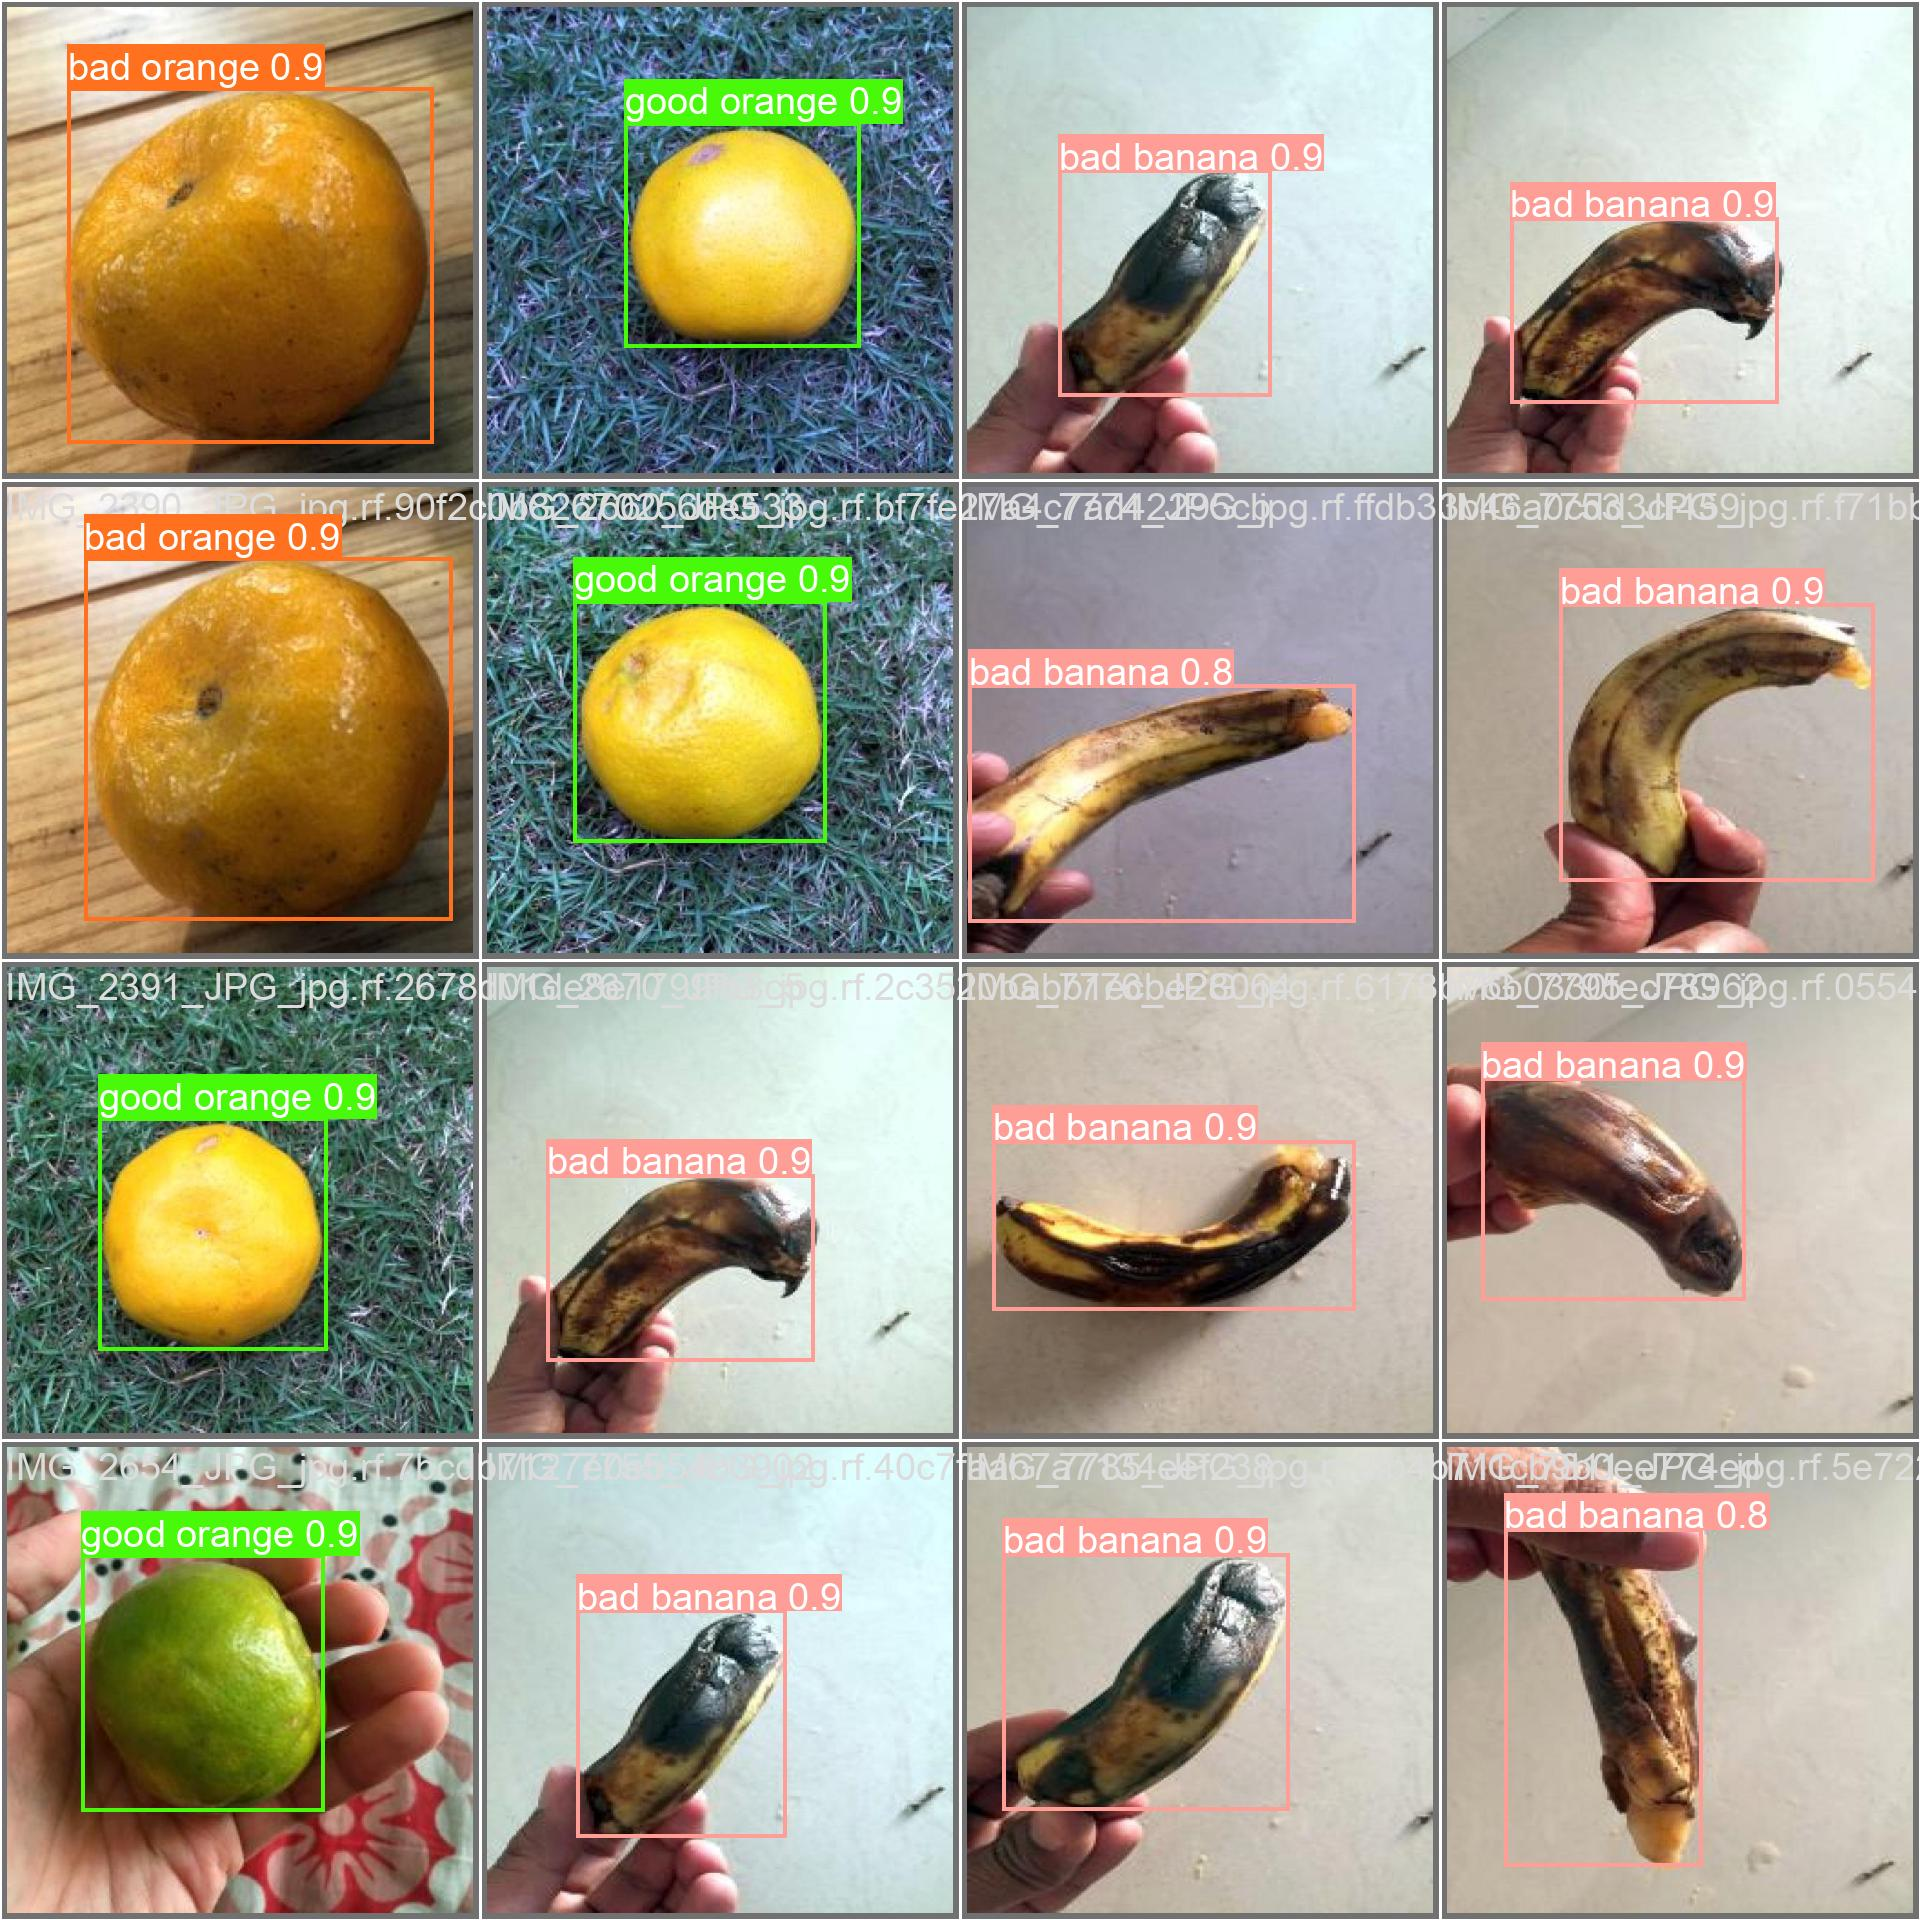

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch1_pred.jpg', width=600)

In [ ]:
##  Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-11-12 17:30:46.734529: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 17:30:46.734588: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 17:30:46.734628: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 17:30:48.392933: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Fruits-Quality-Prediction-3/v

In [ ]:
## Inference with Custom Model


In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-11-12 17:31:31.514749: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 17:31:31.514803: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 17:31:31.514838: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 17:31:32.649161: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
image 1/279 /content/datasets/Fruits-Quality-Prediction-3/tes

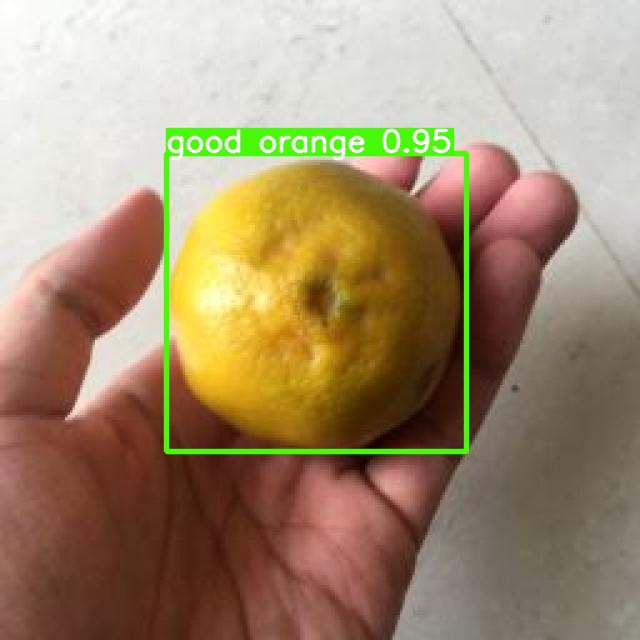

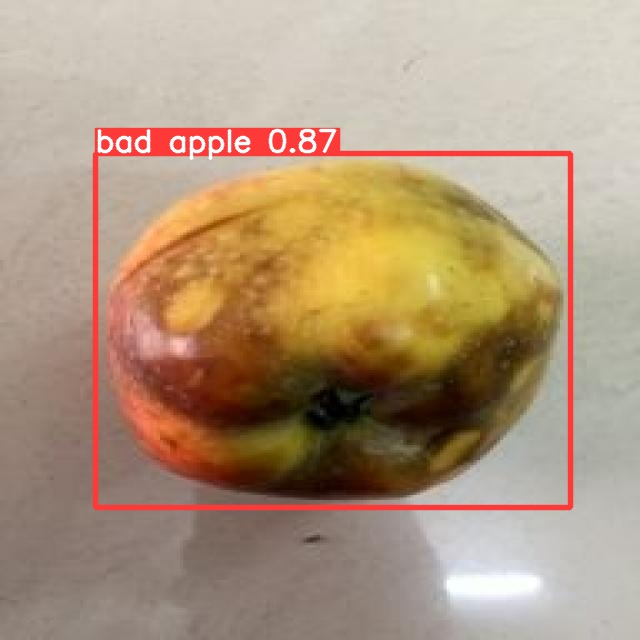

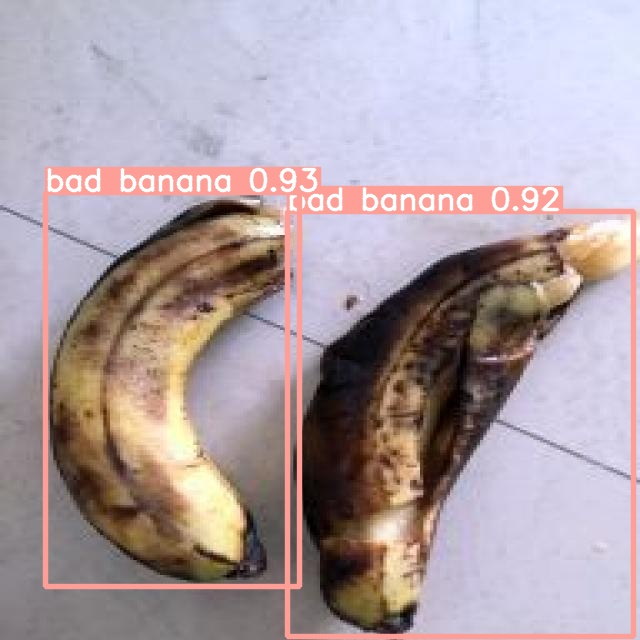

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

/content


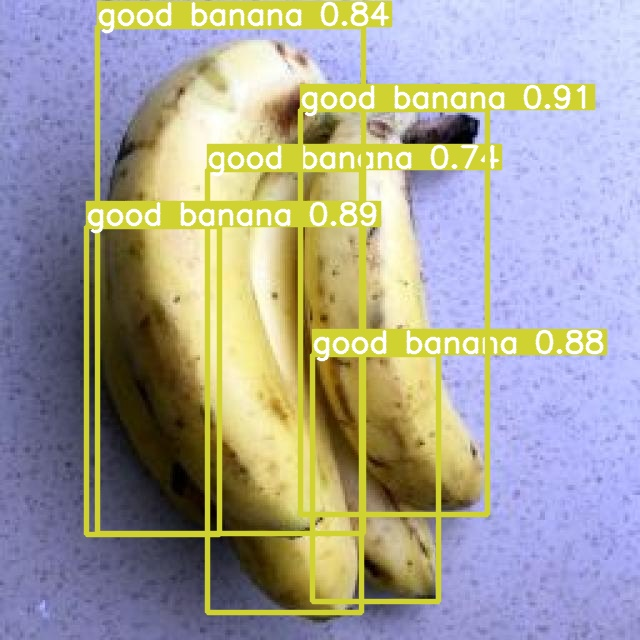

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/predict2/IMG_8817_JPG_jpg.rf.bceec829eba53d90d90f5570ba7c0eb6.jpg', height=600)

/content


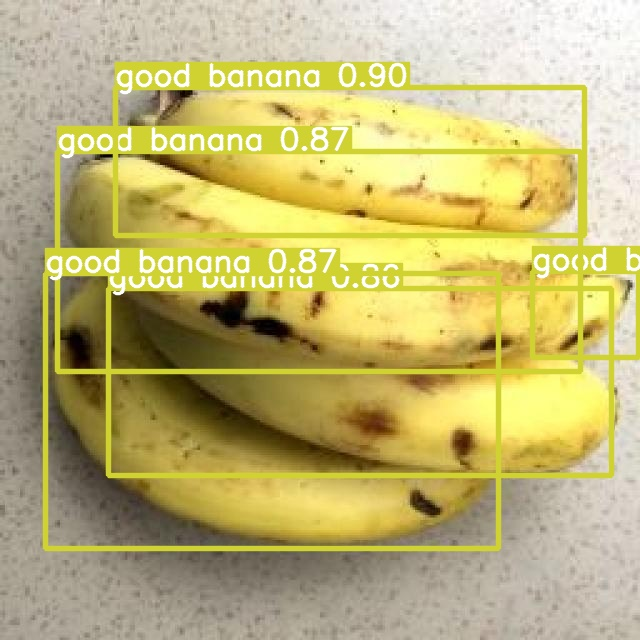

In [ ]:
%cd {HOME}
Image(filename='/content/runs/detect/predict2/IMG_8827_JPG_jpg.rf.cf5850e368f6c1f4002200fdf4192089.jpg', height=600)

/content


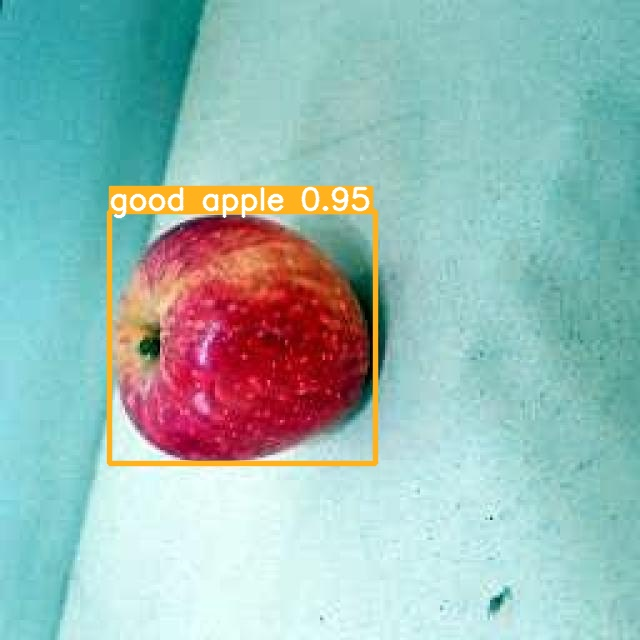

In [ ]:

%cd {HOME}
Image(filename='/content/runs/detect/predict2/20190809_165625_jpg.rf.67b5b589733f6920c54e67f1041471a5.jpg', height=600)

/content


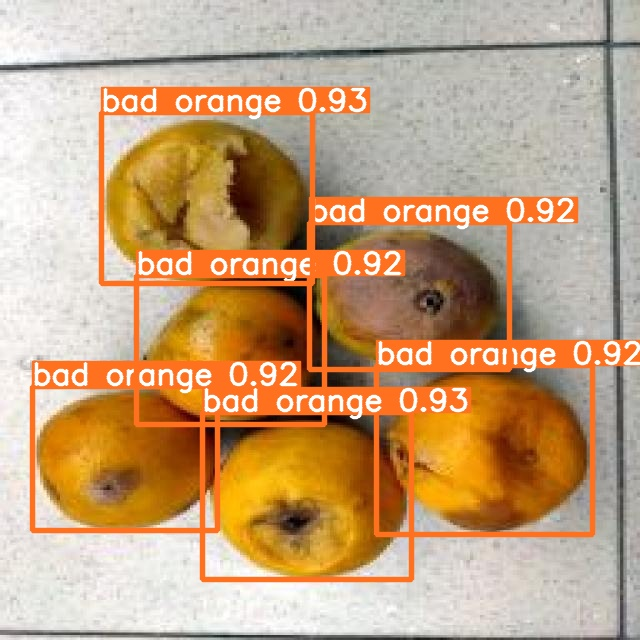

In [ ]:

%cd {HOME}
Image(filename='/content/runs/detect/predict2/IMG20200728140755_jpg.rf.35ae7f1c438399d0b47220611cc6c0d6.jpg', height=600)

In [1]:
#project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API
# import roboflow

# rf = Roboflow(api_key="c2VmkPyw3tV8egvbtta0")
# project = rf.workspace("university-n4tcp").project("fruits-quality-prediction/3")
# dataset = project.version(2)


from roboflow import Roboflow
rf = Roboflow(api_key="c2VmkPyw3tV8egvbtta0")
project = rf.workspace("university-n4tcp").project("fruits-quality-prediction")
dataset = project.version(3).download("yolov8")
#load model
model = project.version(3).model

#choose random test set image
import os, random
test_set_loc ="/runs/detect/predict2/20190809_150524_jpg.rf.9057fe38b8acfd2bb0977c713d5a4693.jpg"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

# #choose random test set image
# import os, random
# test_set_loc = dataset.location + "/test/images/"
# random_test_image = random.choice(os.listdir(test_set_loc))
# print("running inference on " + random_test_image)

# pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
# pred

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fruits-Quality-Prediction-3 in yolov8:: 100%|██████████| 6620/6620 [00:01<00:00, 3872.05it/s]


FileNotFoundError: ignored

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.40 source='data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAoHCBYWFRgWFhYYGRgYHB4cGhwcHBofHBwcGhocGhoaGhwcIS4lHB4rIRohJjgmKy8xNTU1GiQ7QDs0Py40NTEBDAwMEA8QHhISHjQrJCs0NDQ0NDQ0NDQxNDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQ0NDQxNDQ0NDQ0MTQ+NP/AABEIAMIBAwMBIgACEQEDEQH/xAAbAAABBQEBAAAAAAAAAAAAAAADAAECBAUGB//EAEYQAAECAwIMAgcGBAUEAwAAAAEAAgMRIRIxBAVBUWFxgZGhscHRIvAGEzJCUtLhFGJygpLxU6KywgcVQ5PiIzNU8mNzg//EABoBAAMBAQEBAAAAAAAAAAAAAAABAgMEBQb/xAAoEQACAgICAQMFAAMBAAAAAAAAAQIRAxIhMUEEIlEFEzJhcSSBwSP/2gAMAwEAAhEDEQA/AORaDdRWGDJPYqzHGcuystn5kuVnSgzYc6m5EazOTLYUwcdI86FIu111oAmITRqyKw1gld53quHi7v0Cmx7ReCNh4oAHFhSNEhEleHcSiWwZkDXMITtm2XZAFiC4kTJkOI1qwxgvLjxQGAASoZ1pTkptimUpjeO6TCiwXSnl3VQGfsc24pqm8+dyk0VNeP0RY0g3rDdMnae6LDi5zqv7qq0TNzjt+imRSo2EpWOg/rwcvAnqhucDeTuPdAdDkcnHsiWBK/zqTEDezTPdw8SZwaMvIcpqZYPIPRqmWGU5nc6SqxUU3tbP2hLbs91Ta0SvEssw7snfAJFZGf4rhdlTCGbpDc3sqtCaEAB8JG3mWqcIVycD/aEzmuupT7rfoVNgdKpH8qBEw+XvcArcKLQ8KDsqT3feHAdUmRTIyPG/cEDZYfEnkrqHZV3vllH8v0TMiTuyZiZ8lF855d8u6CRi8H3v6So2TOcjuaougyv32r/5UNgAIOTznATAtNYTM0pkm0E7gmtEe6d5UA8EXbLM+SFZ0T1B1eHRIZZaaTl/N9EeFEoZz/UeyqwxSjXbhysqRdklTUPlQAb1jc53u7JIjbPw8PokgRy083VWILs587VRadW5HY7Vr8lQykaM2gfWc03rGeQVWaZ3GaKyFMTn57JDossawj2iNhkjWW08U930VZlJZdR5qQuvIRYUXrAyHjIc0mwBQzltB6qg7bmuVnB6ChI1g90BRefAyznsyKLBM/U9kzIDnOkwW3HJU7dGtbmAejEVw8RY2eSZJ4CXFZPJGLpvkrUxwzNOeqakyCQcoW5hXovGaPCGP0NMnbiOqxvVOtSs+ITBBlMSvnOqN12NK+iDoWcnZX9kIsAMpncO6sx8HsstAWn18PhA0tm73h1uVV2GwnEzJEgB4AKGVQZHiTekslluFBAwb7p/QpGWjVaPUpYKyG97QX2AZibgSWkCdQ0UPma7HBPRXB3NBtOeCL5tlnoJJfdjdEyVdnHWBvHxNpwUfVg0A4g78i6fGfosWtnCdbl7jg2ZGh1xOii5V7iCRZMxf4TfmVxyRlwiask4AGUqHQJDXJQMZguDSfwp24Q6XilkpZu0BRiiZupqktE15JaF66kg0bpHupB33DL83ZC9YPuZk7sIAuA/VLqqTQqCscD7o2z6pFlJcutVXY+ecD8Z+qk15r7WxzurExUW4EKWjdWam8VuJ/KqJjWTUnf0spnYUTkG0k/2oCgzoT55briTyQIkJ+kbHcJojY7jmrrHRSeyspg6ZgV2hFhQBrbpmR2dUX1YlQA56HeKqUbMJXZ6E6kAxDOsthybkWFEbA8zCtMhZt0z0FUNr55vOaiOzCWtpSX5pckWDRL7M41ma/i7JKw3CG5xx7JIsRwbYWaK79DfmRGQ/wD5X/ob8yEyclNqGMsthD+K/wDQzuishNl/3n/oZPmq7X+Qpl5zlQUiy2A0/wCs+f4IfQosLBZj/uxJaGMWc01mjw4pGXZMIAtuwYD/AFIv6YfJFZg7bg+MSZe5DqUH7UJChpmI33rTwF8miIBSchPiRn/dZ5JaxsqKs6bFUJmDM8RJcaucQJmdwpmXRYLhTSJhecxMPt3mYyrQxfjMtpNea1JNyfZb54OvwzHLmOLZAyAM9c+y4/GfpK0PtFgdMzcBIWslSBM0CDjCI6LE8DjZIAdsnUb+Cu4rg4Ox1ksa54ALi4WqmdwNBSSxeVRdtt/o1jibVo4PGeGOixCSS1jjID3bOQVyZddU2B4RYeASbAcJlubLoRvSKGx2EPMNoY2cgGgAUABkMkyCVD7E4QWOc4kOdKzICkqVFTdcvWjmhor8mDUnJteDoMX4YC8OhNIaHAkOMy4znO6Uh1XZYpwx73XkZ1yOJ8FAhvOUC1sbfwmugxXHaBaBBXh+qntK14OmK2jZ1gAzkrmvSfE7HD1s3iz7ViUyMhMwbuWpW2YxrKavNeHtLTWYSx5dWpLwZ6vpnnbYUMkgPwil9WSzi9tUn4NDl7cfQJs+WatYXgdh7mkTlORpdeKakBxAFAf5RxImvoISUkmvJk1RW9RD+OPvZ8ikYUO+3hF3xM+RCiAaK/hJ5ITTk6fRWSWfVwv4mEb4XZO3B4XxxTrcz5FWtE3E+dqG59faJ1ky7KiWXvsUO+1GH52crCg4Qgfawif44fyqo3CALgNjgisiTqZAaDfomQmImGwib8Innts+RSYyHP28JH52fIpsaCbqZATwU/UAiVkA60rAb1cIy/6mEZplzT/YpfZIZExEj/qb1aoepIpQbBzDVEw9p86EAH/y5gq6LG/UyWqdlTdi2H/FwgA5iwgZfgVNkRwlKepWGYc6VWzzTnPKMyYUNExdBBP/AFcJ3w/kSUvtk/dO89kkAcpIC6XFPJDafNEZu0edSLChjsUmlSY4ZUVjAfORSUVy4z+oRwaToifZyc/Ep2Qay7IFYITJEpVoPMlvYa+TWsb7LRId1lYMzxzmKaei0bMxfsXJnktkvguPRSbEkpfaZJozFn4XEshYv38IuPBvwsbBrQGtLnuo1oqSTcJK9AxPhENro0YtaT4i2ZLtAoJaL0H0PxfYlFfV77p3taeRK6nHcW3DsZ1x5XGFxj/tm6yPweaxoZLp3zNduVXY8UOaGDJLhRa2D4u8bJj3hzWazBgImEAXNfZGqbj2WimpL+BjVJ/s2vR91lwK9DbgsKKyTmNIIzAHYRUFeZYnw9gfYJkV2uBYwsaQufd4sm0lw+zOcdlwY2E4ufg8QtJLmmrHHKMx0jscq0sUudMzEq006VqYwDYjARX3mnnwVXBYUlnPXZ69MdtrkyfSXBJODxlob9YuPmS5yKS2Qz6cm9d3jzBbcB8vaaLQ/LXiJjavO4uFjy0bhMr1/RSbhr8GUhPYZT6jkVUdEIzbh0RhFBnNp3IMR5zHYHS3Fy7kZNjPeZU3V6BMwmtTufdy4KDnG+stvdSMXNIb0xCtGdDPRM/3BEhsJ/ZpQGxCbyd9OaJDrm3E8whgXobM3JvZGE5Cl2SmXNIKkxlMl+aX9qsQHnMNZEwkUWXzlUCUqXb6CqqRstx05OaslxDZG+64XKtGJuu86VRBTcNWa5vUpCZz6gWjkURwBGS/4hXZRIkSE5UzGvNMYRsMn3v5iko2x5Le6SmgOcapt80QGhFY0aOPyptDssDz5miNdm6d0JjdPBTFM+4dSoGX4EaV/CSeJEyif13lZrYhy9EcYULux6J0Jmhi9kyVqfZ1WxIyYnnW42AvJz5PezWK4MHCYUlkYBgnro4B9lvidqBoNp6rocctssOlB9HsGssLze8z2Cg6naljnUXIpnQYPIGeWSm+JNAmo2lySWzspBIj5CeZcri+PbdGd8TyVtYxwizDcdB5LncQjwn8XQLaEf8Azk/4aJhMIxfM2m0IXSYle8sBcdWWYyHaqkGDNa+CQ6KM2XaGrIUadmxi6J4LOk8b+PNX8GksrBqFW4GEgFokTaMqXC+/MKLijKmU1ZrOFJZ15bjLBvVxHsMxZcQDO/N7wySO5eoNK4j04wezEY8XPbX8TaHIchG5ep6LJ76+TGXRzjhPK3ea8aoToBM6UuoKT2OUQ+eTZQc0hG1gj7zeU17CMWL1JA9ictSC+EZ5fOpWob5zvr+HboTuYDkPCqdjKrWfekdvVEEIG6vFSax19mWtyZwNbt8+iZJMCWbYFJr5HNsCCx2Sm7jcphwlmnknxuRQWWmv0U0ADimcG1JDtwKCx4kfFTWN9UzyDSrvN6AE1k/ZptM9wqdyg5jqVJ2u3XqTS0ZJbPql9qkcp12eoJRYUQe8zvO93dJF+0j4W8UyLA5xpPmSI11cm4I7A2U6bz1U22DmB0gIbAGI0sjVZhxxK5DELUdgT+rIyVOaXQKQHc9uY8e6CS2V+i8qbrX7kKs41AMrxmzoGzuMTQfA3UFtsh0VHFLPCNS2jD8K+fySuTN0cpj1sy1gvJV3BIUgALhQbKJsOhzjDQFpYJARtUEUwD4arvYVrPgKtEhqE6QJnL+kkSyyzlNOpVXEUPwDSSoekT7T5Zuq0sUwZMbq+q6JPXCv2WuzWwSGtOExV8Fhq81q4HITZAOk9ozz4BXcAE56HHnNZmEOPrGACfhceLR1O5a2LRfvUa9FP8TRCxfS3Bw/B7RE7DgdjvCeY3LbsqjjuGXYNFAvsEj8tei6sMnHJFmL5R5w7BPhYCdFoH+tQ+yvygDNRx/uRcGe+sw7PcOpRozTK6utvZfQ2Yld8M5iTqKG6CfhJN9x4pFzvhO4dQoB9at1TEuQCaCyBa4UsgbB1UZm67cpPtE3Dce6KBZzHSAnYA5iU6bxNCInca6forLxMX3aT1CHCIn+1+9NMTRMQHAe3stfVCqcp2k9lcYwZvOZVI0Nk6WQee1NElZ4OTiHdk8zltbJ9kzzSjGa5FOW6AdQcP7Uxk7Wh3FJQkPh59kkAZTnSyHZJJpF9d6EWjT0U2zyXakAGD5ChI1FTbHdlII85lBhJvIM9HZNaAyBSAWdrNxogn2miY9oZs6Iwg5GoDni22Q94c0P8WHk9PxSzwhbrofhWHiQ+ELoXeyvnmuWbs5qND/6rltYNCk0aVm4M228n4ncJ04LeayihK3Q2yo9ioYbRhK14rFi46d4bOdTN06HHlnE4RBtvJzzK6PAYNAFUwfBqk7B1W3gkJGbLaUUbNUgsGGRkVoNoiw2STvauauDOyk+hWli6/WFhYVHk06XBu8gLdxfe3dwVY4sqXRqIUWHaa5vxNI3iSsBqjKq6dWmmZWeUwSQAK/tsqniPAvpqCnhAsxIjTKbXvFQbg4i+Sd4BF0xq+i+gi7VmMuzPjRbVzhXJarTagtYBUkdeSO+KxpmWgkZLQNdSriLMmyNhl3CuhWGYQNW3oR5Cd8UXXbTdtcgCIBS6uQy5PTPeJijt5uz3oodhHEyu/m+itQSZCcgcgvn04KjFk4kA03lTgTBAmJXCRA4poTNAF1ZkDYOyrvaJTm062tdzViAZiRIByS65CmiMpIv4DmEyShEjSuc0flh7vaQi/8ADX7rByKuR7JvLTwPMKq5zDmGoA9UxgZuzf090kbwadySBGK6ppPanA0nh3ScQKAjcOckp6khhAwZ+XdIjNOmj6pmuOYcVJrSc3FICTdR86wVUwx0iDpB80CtSIzhUcMNKp0JnqPo5GtMC6HD4koTjokNZoOa8/8ARHGHhZuOjyV1uG4TaDGZ3TOofU8F4GWOs2jo7plvFEGo0BbNhVsVwpN1q8Wp4o+2yZPkqPaufxkLTzo8910kYyBOZc6WztHOVy5fyNYFSDDqBmEzrN3DmtXBoaq4LDqTnPKi1oENc690qLlImGoMQK04Knhj7LHHRxWk1xRnHs5HHuFyfBb8Ti46m0H9XBdjgLqMOpeVY1w63hxE6MaGjWPEeZGxel4rjTY06F05cf24wv4v/pW21/06dgQ3hThumJqEQrbJWtmK7PMvSWTMJiyJBLgZVPtNDrrllsj5LL78jT1K3/S8NbhDyRMlrTKmazn0LnX4aRMBkr8p6EL1cDuCf6Jl2FdHpe+WiYlvKrR8IaT4XOGs9ZqBe808Q2PPKaA4OBvJ3jmF0JENhnGdbRO2Z4kp2QT8Lq/cO+YaoATGTee4QHFt5rv6kpJDsuNhkXNfLLQjm1EYZEUcc2f+lZ5LbwwbZIsGM7JIfhn3ToRqB8vdIGcz25Ez8KGQnbZ7LMiXzm79XC4phfIl36iUUIsxMIGaWnwnkENrh8R3c6BOwAmkzvRRDJunrN0tSYytPSUkX7Oc43fVMgVmIa3T87UVhlkGsz7pnSF13ncmD9JHJABQ4DNx7p2P7XoQikZa6PoVNkV2c7a80qGPEqJk8+yz8Jl5n2V52noqmEyyJxQmTxBjEw3luS/uvR8SYR611rIABtvPReRvBBmKEL1n0HhH1DHG99d5mvN+owUVsu3waYpXwd7gbJNA0I7k0NnJSesYKoA+zMxrFDIbnG4Ce6p5LMDJMBN8gtHGonZaMqHHZ4QF52Vq2bx4oqQGSC1ILKKk6ESGy+IT1BaTBRZ4I+6wmyvFLp3cVh+keGBkMk3NBcfyi5b8Yrzf0+wzw2B7xDdjanjJb4sX3Myj4bEnSs4NmEkRREdeX2nfmPi5lesej+FgsAncvI3t81XWei2M/DZn4mUIzjIV6/1DBtBNeDLFLlpnsGK45cwTyEjYLlbeVzvo/hwcS34qjqFvuK8lT9tM1ceTz30zhj7STlsNEzKV7spyrmntZKUjPOCL9gWp6Z4VPC3gTNkNbQt+EON4zmSwGGeQ7+y9708axL+GEnyO+PWTWjaB2URhL9Q1CXJIsJNAZcONUhIe9LL+63JHm40odX0S9WZ3A70wjDJXT4RXPVPbdnluQBNsEznLzuUiG5yNvQKuWEm88VMQZSmeA5kIFYb1wvkTpuUnYY47M8zzUHMZdbGQ+7zpyTWmC4z2DumIf1hkTarml3UbL5TkNcgofajk4D6qD47zn3fVABvVHyEyDJ5+LztSTAokSyAb1J7tJTMcZ/REr9ahSMZp07DPspAUvUA8zvHE805cTJAEYgkgxLs6M9t5JHnYhvbt2BNCZnxW6F7Z6K4OGw4LcwA3NXjrmtmKOvF8l7F6MRJlozT4Beb9Rd6r9muFdnXsUXFJrlB7lhKXA0jMwl04wGYJ8LNWjb06rhce+mZgYU9rWB9ihJcRe0HIDnWp6PekX2y0+wWBsmyJnWpJBzVC4svpssYvI1wzWMo3R1MEKy0qpBfRHt0WeFpIUkBwyIGsccw/ZeNelGGW45GRgltNT0GxelelGMWsYRPJaOqsq7F5CXWiSb3Ek3Xmq9P6dj2k5vx0RkdRS+Su8KMCO5jw9pqOOgo0QSyedyrvZX917LSapnP0z0D0ax40uBnZmagn2XZD+E3LqsYenGCwnNa5xc73gwWi05jKk9q8YhTBoZUlebiruCsaDMynx3rzn9Pg5uTbr4N/uto3sOw71keJEa2j3lwtTmBOl2UBVnvfdMjWDL6qMJ7MwO2vFOIguFJZRLmSu2K1VIzfLI2HGpPGXNTdAynnOaYtPxT28yCkJ5m8f7kwoTrI+kpcSmdEN4sddwEkWcrzLQBLjMFBMUZ3u/MR/cUAJr5ymdg/ZTYJOmARpkDkz2k4i5jLX4jyKG9xN5PHsgQc4Nlt7zLmVCJClUEH8wHVCdI37z9UnMBlLk1AEi8ge7tLJ/1JvWmY6S6FIMpk4JvVHKQNyAD23fE7e7ukherb8Q3fRJPgAQxaRe+Hvf8AKo/5f99hOYWuZbRRZEGSW23PgAk2LMi6X5uqi2VQUYuOR8PVN/Vs0z8EcPfYdVv5U7IpuEztcoetkbuJ7othSG+wOPvs2l3Vqg/AyPeZx+VSe8m6W/6qDny8/VPkXBViYMRW0zeey9R9EcKDns0g8l5bEec66X0RxjYiQwT7LwNjqdVx+txuUFL4Lxvlo9jL1Vw6JJjjOUmmqJaXKf4hYz9Vgzmgyc/wjPXzPYvLi3kkoLyXVcnkOM8IMSK98vbc4gzF06cJLuP8OXygxB9+e9rey8+sDzJdt/h1FAc9hPtNDhUZCQeYXq+tj/jtLxRnifus9DwaMrfrVSYySyPSjGogQXSPjd4WjKvn8UJTkorydLS7OY9Nca+seWNIlOuodyOC5uDAHxt3O7KAeXG06pNTVWoTNHFvZfT4MSxQUUcsns7Gfgol7bdzkNuLnGocJbUeZGTiOgTAm+R3u7rVyYqRWGLxOr2D9XZXsGxa03xoY2P6BCa83+L9TupRw4g+0/8AUeylyY0kX4WLGf8AkQyfwxOyuQ8Twz/rw5/ges5kVxAo7a93yqZfaAybuZCVyCkaP+UM/jM/2n81F2Jof8VuX3IiqTl7p1mbuFmSd0Am6QN9Wjo2iNpBSLcPE0PJGZ/txNlzlCLiyHcY4Gn1TudtUntAvAnr/wCKKwCc7AA28gAlb+Q1QRmL4H/kiYyeqd8yl/l0E/6xP/5OP91VXfFl7LN5d0uURHPwin45J7MKLf2CCK+skP8A6ndXqf2OEJ2Y09UMHiXqicLcT7AOb2v3TMwt+Yb4nDxItipGgzFrHf6p/wBsbqOSGJ2fxf5W8rc1TOEPyjeT1co23EXDfx9pLZj1Rd/yqF/EP+3/AMklm+LMN5+ZJGzFSMtrJCp4/VKzlnXzpU2idKfzdknM0Hj2VJjaEXDONXkJrQl/6pPF5u2lJhqLhtMuSYhFwzjbk/lQolffB39kZ5JrU7Sq0QjLPehBYB5rf/MFOBhFl4M5ZDl23KJa0n6gKu8DzJNxUlTFbXJ6/iv05wUsaHxLLwPEC114vqBKS4n/ABAxy3CXwrBmwMLpaXOIF2Wy0GWSa5F3m7unAXNi9FDHPeNjlkbVCsrZ9HsMEGOx5o0TDjI3HyNyymMmZBFiiQ0/hHZdE4qUXF+Qi65PQsYenEJjPB435hcNa4jGuNH4Q+2/JcBcNQWYAjQ261jh9Jjw8xXPyN5JSLUBk/P/ABVtjDkmR5+6q0MAeR3VqERn5d1swRNwGYazZv8A0prIlM2f0joEYtGjc35lIMpQCesd1PA6ZVa0H4TsHZW4UOXak5bkwZIG0DolK/SSaBOyKBm2y6lP+AHIlkuzho87k8N1DQbofZJmgjUDfuelv8/mKhsdEYlr3Q39LP3UWMddSd1wTuMjftFOqIx0wfa0mQyZzaCLAgYxOUbuSalKt49U5IFxlsb86ZpyzG5nzpgJ+oUzDqXqLSCLxvHK0ptdKpFckrHQpy8Tvlnv+dAEXEUE2kjWf7qJCX3dzeqIXtyS6/1p2RRsz/u5CaJaYMXymNgH0miRpGUgJ669QkZTvntkpunKktrqclVoVMb1Yznh3SUbTs6SAOfc4zvR2lJJHgaJTohN88EkkLoYhENm871LCHGlUkkl2D6K5yqlFSSWqMmDRW3JJJsETa458iZ1ySSldleAStQOqSSbJRow8moJ4bzK85EySyNQ7HGZqilxsOr5mkkpZUSGDG/UtDAjNwBqMxSSVEosMYJuoL+6rYRQiVKJJLPyX4BOPhCg00TJKkSycVxz507Gizdn5FJJMCBFRrSj5PORMkgTGybU3rXSFTvKZJA0D9a6ftHeUZsV2c7zmTpJMCERxmapJJKgP//Z' save=True

/content
2023-11-12 17:44:00.074076: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-12 17:44:00.074132: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-12 17:44:00.074167: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-12 17:44:01.241968: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs
Traceback (most recent call last):
  File "/usr/local/bin/yol

In [ ]:
https://app.roboflow.com/university-n4tcp/fruits-quality-prediction/deploy/3
